## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/01_phylum_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,67,0,0,31.25,17.0
2,P3,1,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,...,0.0,0.0,0.0,0.01888,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,66,0,0,93.75,21.0
4,P5,1,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,...,0.0,0.0,0.0,0.00000,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:27]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Bacteria;NA,Bacteria;Nitrospirae,Bacteria;Parcubacteria,Bacteria;Proteobacteria,Bacteria;Saccharibacteria,Bacteria;Spirochaetae,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia
0,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,0.010153,0.015403,...,0.0,0.0,0.0,0.464638,0.0,0.000000,0.0,0.0,0.0,0.00000
1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.132169,0.0,0.000000,0.0,0.0,0.0,0.00000
2,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.349757,0.0,0.000000,0.0,0.0,0.0,0.01888
3,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,0.000000,0.005638,...,0.0,0.0,0.0,0.423237,0.0,0.000000,0.0,0.0,0.0,0.00000
4,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.432492,0.0,0.000000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000128,0.000000,0.0,0.557789,0.0,0.018314,0.0,0.0,0.007885,0.002309,...,0.0,0.0,0.0,0.229560,0.0,0.002809,0.0,0.0,0.0,0.00000
87,0.000153,0.000000,0.0,0.455137,0.0,0.000529,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.083915,0.0,0.000000,0.0,0.0,0.0,0.00000
88,0.000395,0.000000,0.0,0.284385,0.0,0.006841,0.0,0.0,0.000760,0.000000,...,0.0,0.0,0.0,0.653484,0.0,0.000000,0.0,0.0,0.0,0.00000
89,0.000000,0.000000,0.0,0.595302,0.0,0.004668,0.0,0.0,0.000146,0.000000,...,0.0,0.0,0.0,0.052485,0.0,0.000000,0.0,0.0,0.0,0.00000


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:27]
y = df.iloc[:,1]

## Train, predict and explain

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X, y)
y_predxgb = clfxgb.predict(X)

In [9]:
print('Accuracy:',accuracy_score(y, y_predxgb))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predxgb))
print('F1 score:',f1_score(y, y_predxgb,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predxgb))
print(confusion_matrix(y, y_predxgb))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


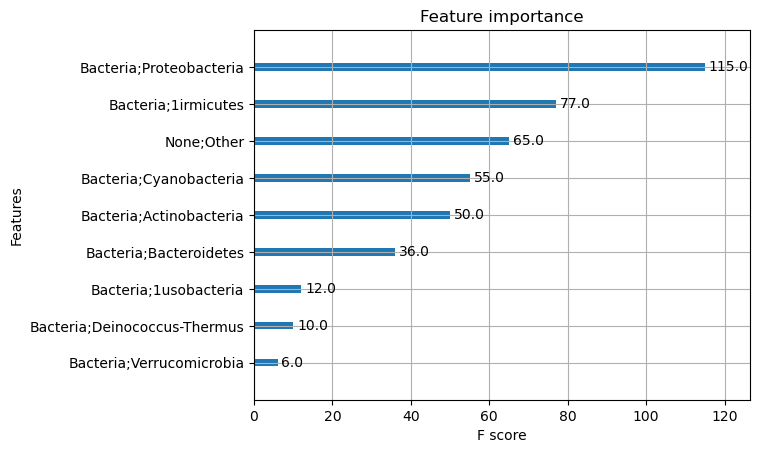

In [10]:
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [ ]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X)

In [12]:
shap_valuesxgb.shape

(91, 25)

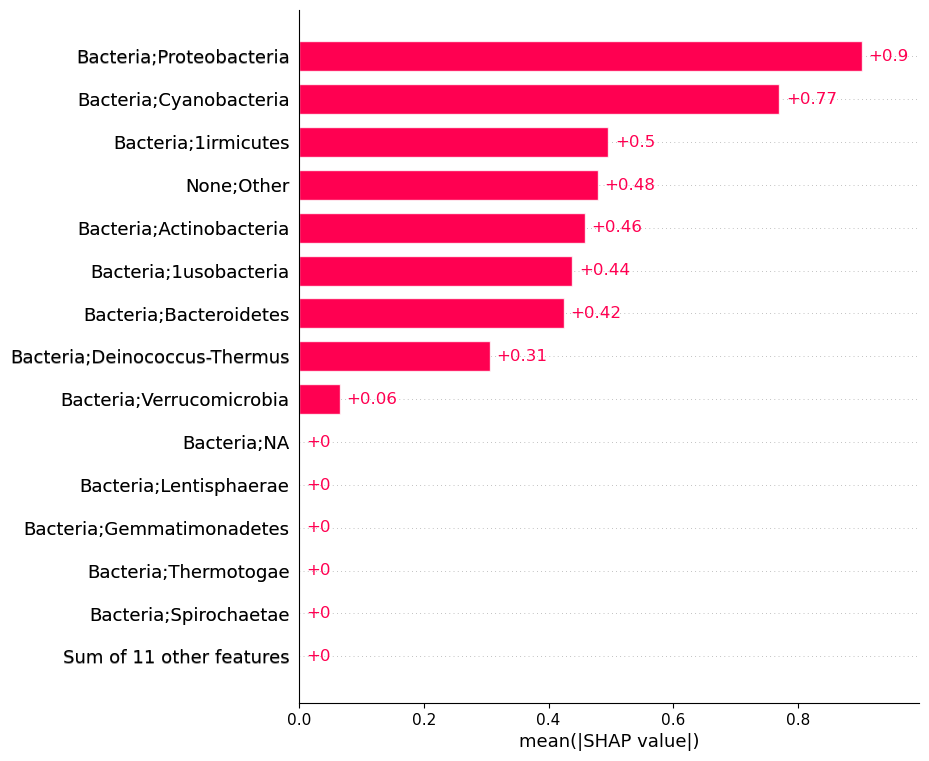

In [27]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb, max_display=15)

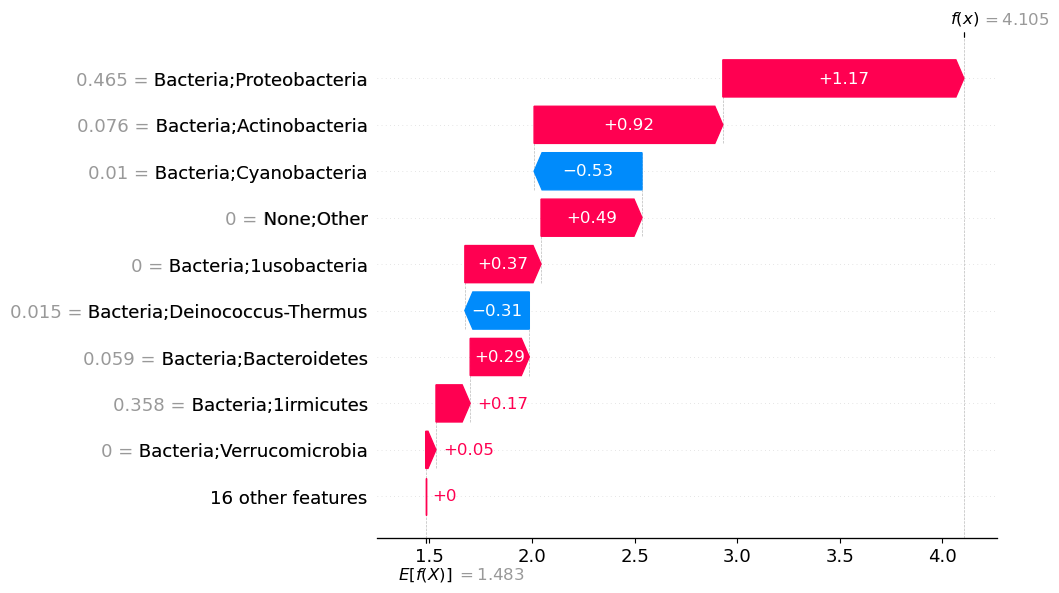

In [14]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_predlgbm = clflgbm.predict(X)

In [16]:
print('Accuracy:',accuracy_score(y, y_predlgbm))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predlgbm))
print('F1 score:',f1_score(y, y_predlgbm,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predlgbm))
print(confusion_matrix(y, y_predlgbm))

Accuracy: 0.9120879120879121
Balanced accuracy:  0.875136612021858
F1 score: 0.9092643467643468
MCC: 0.8003905827517744
[[23  7]
 [ 1 60]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

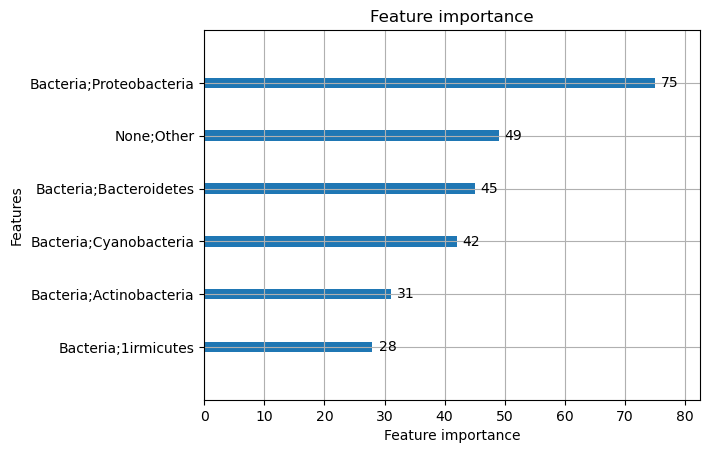

In [17]:
lgb.plot_importance(clflgbm)

In [18]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X)

In [19]:
# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X)

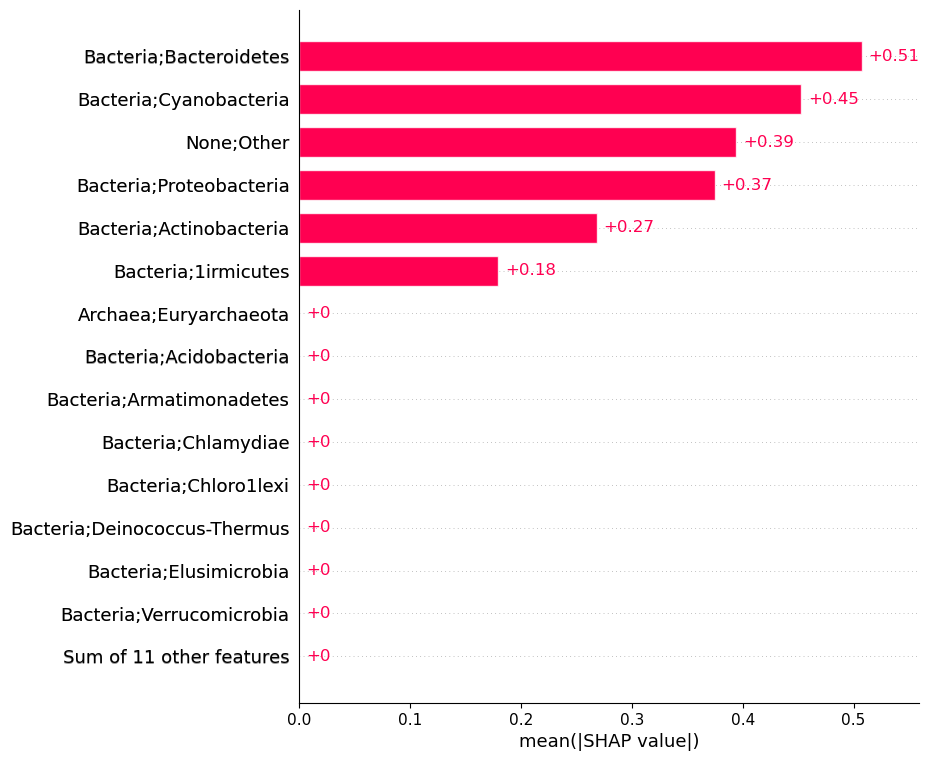

In [28]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm, max_display=15)

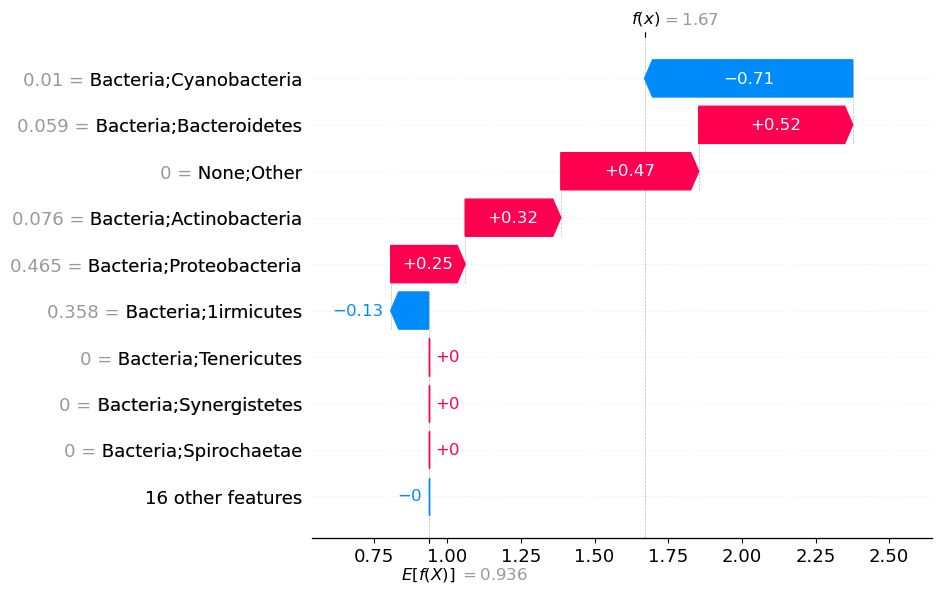

In [21]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])

### Multilayer perceptron

In [22]:

clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"
clfmlp.fit(X, y)
y_predmlp = clfmlp.predict(X)

In [23]:
print('Accuracy:',accuracy_score(y, y_predmlp))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predmlp))
print('F1 score:',f1_score(y, y_predmlp,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predmlp))
print(confusion_matrix(y, y_predmlp))

Accuracy: 0.7692307692307693
Balanced accuracy:  0.6923497267759563
F1 score: 0.7528711889614145
MCC: 0.4449426792214893
[[14 16]
 [ 5 56]]


In [24]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clfmlp,X, y,n_repeats=20, random_state = 42)

In [25]:
MLPfeatures = pd.DataFrame(clfmlp.feature_names_in_,columns=['Features'])
MLPfeatures['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
MLPfeatures = MLPfeatures.sort_values(by = 'Importance_values',ascending=True)[-15:]
#Remove features with importance =0
MLPfeatures=MLPfeatures[MLPfeatures['Importance_values']!=0]

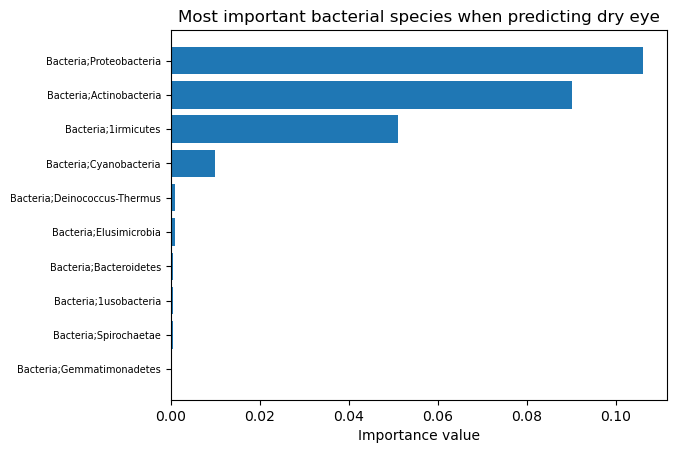

In [29]:
plt.title('Most important bacterial species when predicting dry eye')
plt.xlabel('Importance value')
plt.yticks(size=7)
plt.barh(MLPfeatures['Features'], MLPfeatures['Importance_values'], height=0.8)
plt.show()